In [ ]:
#import modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
# Specify the directory
directory = 'COMSOL_data'
current = 400 # current set point for this dataset -> may change

z_files = []
x_files = []

# Iterate over all files in the directory
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    # Check if it's a file (not a subdirectory)
    if os.path.isfile(file_path):
        if 'pulse_x.txt' in file_path:
            x_files.append(file_path)
        if 'pulse_z.txt' in file_path:
            z_files.append(file_path)

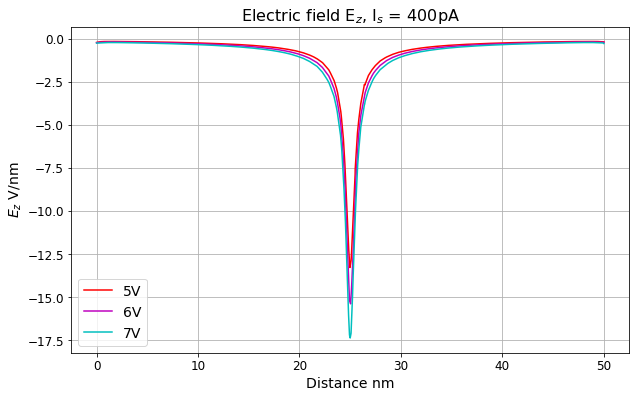

In [72]:
#Plot E_z data
colors = ['r','m','c']
i=0

plt.figure(figsize=(10, 6))
plt.rcParams.update({
    'axes.labelsize': 14,    # Axis labels font size
    'xtick.labelsize': 12,   # X-tick labels font size
    'ytick.labelsize': 12,   # Y-tick labels font size
    'axes.titlesize': 16     # Title font size
})

for file in z_files:
    df = pd.read_csv(file, delimiter='\t')
    voltage = file.split('/')[1].split('V')[0]

    df[['Distance', 'E_field']] = df['% Model:              STM_tip.mph'].str.split(' ', 1, expand=True)
    df = df[7:]

    df['Distance'] = pd.to_numeric(df['Distance'])
    df['E_field'] = pd.to_numeric(df['E_field'])

    # Create the plot
    plt.plot(df['Distance'], df['E_field'], marker='', color=colors[i], linestyle='-', label=f'{voltage}V')
    
    i+=1

    # Add titles and labels
    plt.title(f'Electric field E$_z$, I$_s$ = {current}pA')
    plt.xlabel('Distance nm')
    plt.ylabel('$E_z$ V/nm')
    plt.legend(fontsize=14)
    plt.grid(True)

plt.savefig('figures/E_z.png')

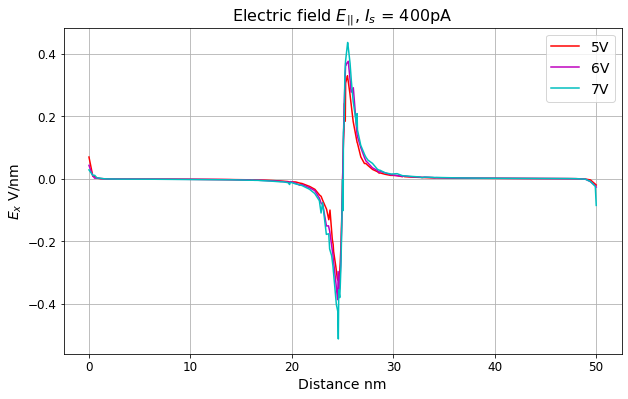

In [73]:
#plot E_x data

colors = ['r','m','c']
i=0

plt.figure(figsize=(10, 6))

for file in x_files:
    df = pd.read_csv(file, delimiter='\t')
    voltage = file.split('/')[1].split('V')[0]

    df[['Distance', 'E_field']] = df['% Model:              STM_tip.mph'].str.split(' ', 1, expand=True)
    df = df[7:]

    df['Distance'] = pd.to_numeric(df['Distance'])
    df['E_field'] = pd.to_numeric(df['E_field'])

    # Create the plot
    plt.plot(df['Distance'], df['E_field'], marker='', color=colors[i], linestyle='-', label=f'{voltage}V')
    
    i+=1

    # Add titles and labels
    plt.title('Electric field $E_{||}$, $I_s$ = ' + str(current) + 'pA')   
    plt.xlabel('Distance nm')
    plt.ylabel('$E_x$ V/nm')
    plt.legend(fontsize=14)
    plt.grid(True)

plt.savefig('figures/E_x.png')